In [ ]:
# Instalamos statsbombpy
!pip install statsbombpy

# Importar librerías
from statsbombpy import sb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


# Configurar visualizacón de estilos gráficos
sns.set(style="whitegrid")

In [ ]:
# Listar competiciones disponibles
sb.competitions()

/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596



Tipos de datos en 'competitions':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             74 non-null     int64 
 1   season_id                  74 non-null     int64 
 2   country_name               74 non-null     object
 3   competition_name           74 non-null     object
 4   competition_gender         74 non-null     object
 5   competition_youth          74 non-null     bool  
 6   competition_international  74 non-null     bool  
 7   season_name                74 non-null     object
 8   match_updated              74 non-null     object
 9   match_updated_360          56 non-null     object
 10  match_available_360        10 non-null     object
 11  match_available            74 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 6.1+ KB
None
Partidos cargados: 74


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


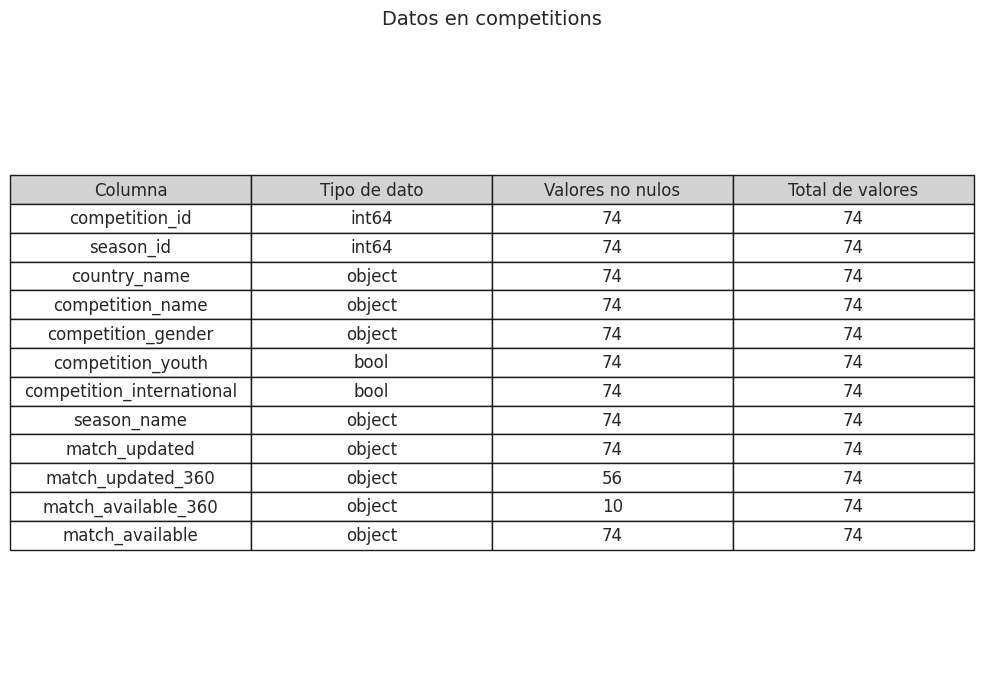

In [ ]:
# Tipo de datos que hay en competitions
print("\nTipos de datos en 'competitions':")
print(sb.competitions().info())

#Realizamos un análisis inicial de los datos disponibles
print(f"Partidos cargados: {sb.competitions().shape[0]}")

# Crear resumen de columnas
resumen = pd.DataFrame({
    "Columna": sb.competitions().columns,
    "Tipo de dato": sb.competitions().dtypes.astype(str).values,
    "Valores no nulos": sb.competitions().notnull().sum().values,
    "Total de valores": len(sb.competitions())
})

# Preparar datos para mostrar en tabla
tabla_data = resumen.values.tolist()
column_labels = resumen.columns.tolist()

# Crear figura
fig, ax = plt.subplots(figsize=(10, len(resumen) * 0.5 + 1))
ax.axis('off')  # Quitar ejes

# Agregar tabla a la figura
tabla = ax.table(cellText=tabla_data,
                 colLabels=column_labels,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.5)

# Cambiar color de fondo de la fila de encabezados
for (row, col), cell in tabla.get_celld().items():
    if row == 0:
        cell.set_facecolor('lightgrey')

# Título
plt.title("Datos en competitions", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(



Cargando 1. Bundesliga 2023/2024...
Partidos añadidos: 34

Cargando 1. Bundesliga 2015/2016...
Partidos añadidos: 306

Cargando African Cup of Nations 2023...
Partidos añadidos: 52

Cargando Champions League 2018/2019...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 2017/2018...
Partidos añadidos: 1

Cargando Champions League 2016/2017...
Partidos añadidos: 1


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(



Cargando Champions League 2015/2016...
Partidos añadidos: 1

Cargando Champions League 2014/2015...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 2013/2014...
Partidos añadidos: 1

Cargando Champions League 2012/2013...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 2011/2012...
Partidos añadidos: 1

Cargando Champions League 2010/2011...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 2009/2010...
Partidos añadidos: 1

Cargando Champions League 2008/2009...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 2006/2007...
Partidos añadidos: 1

Cargando Champions League 2004/2005...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 2003/2004...
Partidos añadidos: 1

Cargando Champions League 1999/2000...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 1972/1973...
Partidos añadidos: 1

Cargando Champions League 1971/1972...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Champions League 1970/1971...
Partidos añadidos: 1

Cargando Copa America 2024...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 32

Cargando Copa del Rey 1983/1984...
Partidos añadidos: 1

Cargando Copa del Rey 1982/1983...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Copa del Rey 1977/1978...
Partidos añadidos: 1

Cargando FA Women's Super League 2020/2021...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 131

Cargando FA Women's Super League 2019/2020...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 87

Cargando FA Women's Super League 2018/2019...
Partidos añadidos: 108

Cargando FIFA U20 World Cup 1979...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando FIFA World Cup 2022...
Partidos añadidos: 64


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(



Cargando FIFA World Cup 2018...
Partidos añadidos: 64


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(



Cargando FIFA World Cup 1990...
Partidos añadidos: 1

Cargando FIFA World Cup 1986...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 3

Cargando FIFA World Cup 1974...
Partidos añadidos: 6

Cargando FIFA World Cup 1970...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 6

Cargando FIFA World Cup 1962...
Partidos añadidos: 1

Cargando FIFA World Cup 1958...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 2

Cargando Indian Super league 2021/2022...
Partidos añadidos: 115

Cargando La Liga 2020/2021...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 35

Cargando La Liga 2019/2020...
Partidos añadidos: 33

Cargando La Liga 2018/2019...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 34

Cargando La Liga 2017/2018...
Partidos añadidos: 36

Cargando La Liga 2016/2017...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 34

Cargando La Liga 2015/2016...
Partidos añadidos: 380


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(



Cargando La Liga 2014/2015...
Partidos añadidos: 38

Cargando La Liga 2013/2014...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 31

Cargando La Liga 2012/2013...
Partidos añadidos: 32

Cargando La Liga 2011/2012...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 37

Cargando La Liga 2010/2011...
Partidos añadidos: 33

Cargando La Liga 2009/2010...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 35

Cargando La Liga 2008/2009...
Partidos añadidos: 31

Cargando La Liga 2007/2008...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 28

Cargando La Liga 2006/2007...
Partidos añadidos: 26

Cargando La Liga 2005/2006...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 17

Cargando La Liga 2004/2005...
Partidos añadidos: 7

Cargando La Liga 1973/1974...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Liga Profesional 1997/1998...
Partidos añadidos: 1

Cargando Liga Profesional 1981...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 1

Cargando Ligue 1 2022/2023...
Partidos añadidos: 32

Cargando Ligue 1 2021/2022...
Partidos añadidos: 26

Cargando Ligue 1 2015/2016...
Partidos añadidos: 377

Cargando Major League Soccer 2023...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 6

Cargando North American League 1977...
Partidos añadidos: 1

Cargando NWSL 2018...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 36

Cargando Premier League 2015/2016...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 380

Cargando Premier League 2003/2004...
Partidos añadidos: 38

Cargando Serie A 2015/2016...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 380

Cargando Serie A 1986/1987...
Partidos añadidos: 1

Cargando UEFA Euro 2024...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 51

Cargando UEFA Euro 2020...
Partidos añadidos: 51

Cargando UEFA Europa League 1988/1989...


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Partidos añadidos: 3

Cargando UEFA Women's Euro 2022...
Partidos añadidos: 31

Cargando Women's World Cup 2023...
Partidos añadidos: 64

Cargando Women's World Cup 2019...
Partidos añadidos: 52

Total de partidos cargados: 3433

Tipos de datos en 'matches':


/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   match_id               3433 non-null   int64 
 1   match_date             3433 non-null   object
 2   kick_off               3428 non-null   object
 3   competition            3433 non-null   object
 4   season                 3433 non-null   object
 5   home_team              3433 non-null   object
 6   away_team              3433 non-null   object
 7   home_score             3433 non-null   int64 
 8   away_score             3433 non-null   int64 
 9   match_status           3433 non-null   object
 10  match_status_360       3433 non-null   object
 11  last_updated           3433 non-null   object
 12  last_updated_360       1797 non-null   object
 13  match_week             3433 non-null   int64 
 14  competition_stage      3433 non-null   object
 15  stadium              

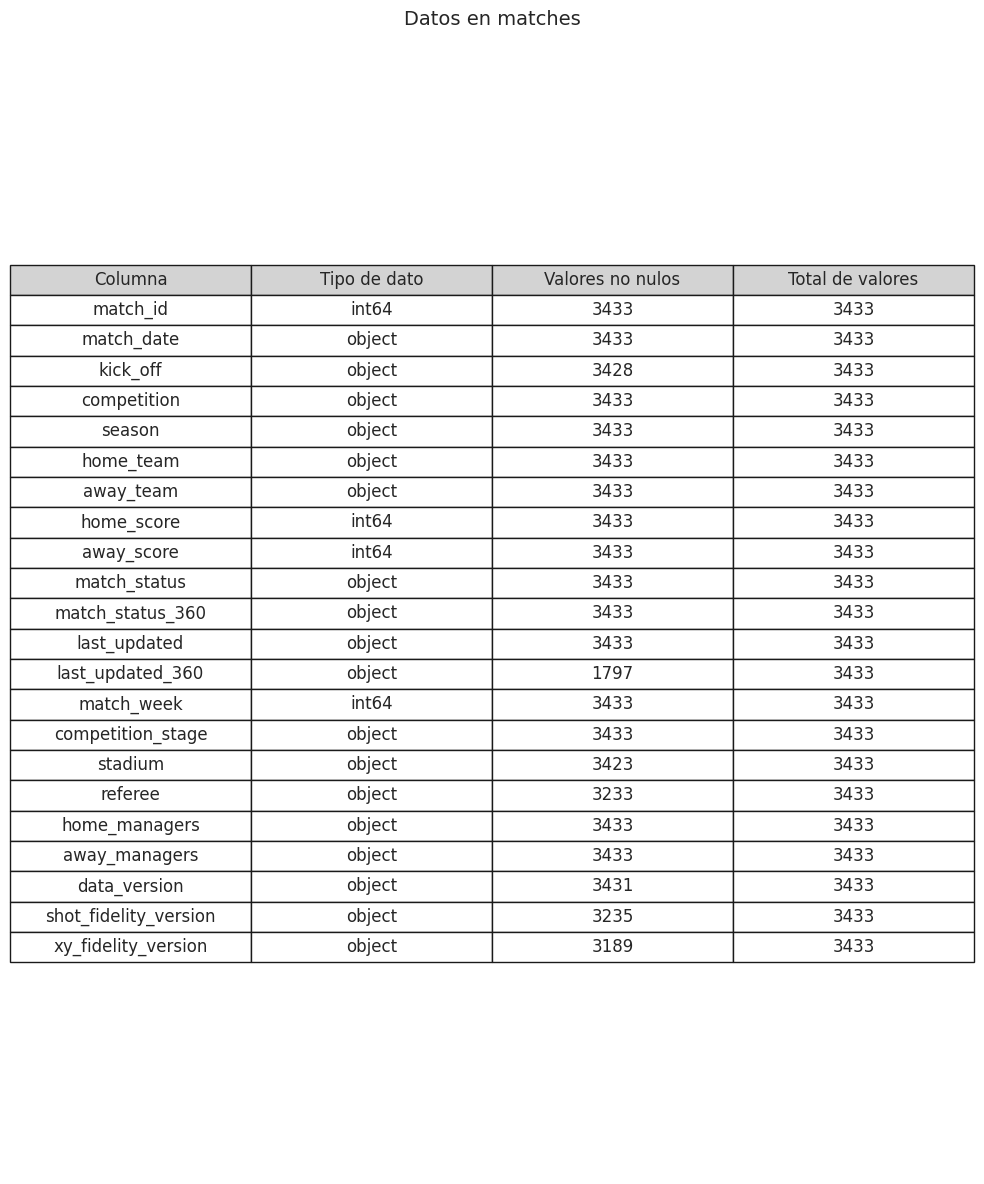

In [ ]:
# DataFrame para almacenar todos los partidos
all_matches = pd.DataFrame()

for _, row in sb.competitions().iterrows():
    comp_name = row['competition_name']
    season_name = row['season_name']
    comp_id = row['competition_id']
    seas_id = row['season_id']

    print(f'\nCargando {comp_name} {season_name}...')

    # Cargar partidos de esta competición y temporada
    partidos = sb.matches(competition_id=comp_id, season_id=seas_id)
    partidos_df = pd.DataFrame(partidos)

    # Mostrar cantidad de partidos cargados
    print(f'Partidos añadidos: {len(partidos_df)}')

    # Concatenar con los partidos existentes
    all_matches = pd.concat([all_matches, partidos_df], ignore_index=True)

# Resultado final
print(f"\nTotal de partidos cargados: {len(all_matches)}")

# Tipo de datos que hay en matches
print("\nTipos de datos en 'matches':")
print(all_matches.info())

#Realizamos un análisis inicial de los datos disponibles
print(f"Partidos cargados: {all_matches.shape[0]}")

# Crear resumen de columnas
resumen = pd.DataFrame({
    "Columna": all_matches.columns,
    "Tipo de dato": all_matches.dtypes.astype(str).values,
    "Valores no nulos": all_matches.notnull().sum().values,
    "Total de valores": len(all_matches)
})

# Preparar datos para mostrar en tabla
tabla_data = resumen.values.tolist()
column_labels = resumen.columns.tolist()

# Crear figura
fig, ax = plt.subplots(figsize=(10, len(resumen) * 0.5 + 1))
ax.axis('off')  # Quitar ejes

# Agregar tabla a la figura
tabla = ax.table(cellText=tabla_data,
                 colLabels=column_labels,
                 cellLoc='center',
                 loc='center')

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(1, 1.5)

# Cambiar color de fondo de la fila de encabezados
for (row, col), cell in tabla.get_celld().items():
    if row == 0:
        cell.set_facecolor('lightgrey')

# Título
plt.title("Datos en matches", fontsize=14, pad=20)

plt.tight_layout()
plt.show()

In [ ]:
# Almacenar competiciones
competitions = sb.competitions()

# Lista de competiciones a cargar
competiciones = [
    ('UEFA Euro', '2024'),
    ('Copa America', '2024'),
    ('African Cup of Nations', '2023'),
    ('FIFA World Cup', '2022'),
    ('UEFA Euro', '2020')
]

# DataFrame para almacenar todos los partidos
matches = pd.DataFrame()

for comp_name, season_name in competiciones:
    # Buscar competition_id y season_id correspondiente
    comp_info = competitions[
        (competitions['competition_name'] == comp_name) &
        (competitions['season_name'] == season_name)
    ]

    if len(comp_info) == 0:
        print(f'No se encontró {comp_name} {season_name}')
        continue

    comp_id = comp_info['competition_id'].values[0]
    seas_id = comp_info['season_id'].values[0]

    print(f'\nCargando {comp_name} {season_name}...')
    print(f'Competition ID: {comp_id}')
    print(f'Season ID: {seas_id}')

    # Cargar partidos de esta competición y temporada
    partidos = sb.matches(competition_id=comp_id, season_id=seas_id)
    partidos_df = pd.DataFrame(partidos)

    # Mostrar cantidad de partidos cargados
    print(f'Partidos añadidos: {len(partidos_df)}')

    # Concatenar con los partidos existentes
    matches = pd.concat([matches, partidos_df], ignore_index=True)

# Resultado final
print(f"\nTotal de partidos cargados: {len(matches)}")

In [ ]:
# Realizamos una selección de variables para cada uno de nuestros partidos
# Añadimos variable objetivo: Diferencia de goles
matches["goal_diff_home"] = matches["home_score"] - matches["away_score"]
matches["goal_diff_away"] = matches["away_score"] - matches["home_score"]
# Eliminamos las columnas innecesarias, es decir, nos quedamos con las que queremos
# Ahora solo nos quedamos con esas dos columnas
matches = matches[['match_id','home_team','away_team','home_score','away_score','goal_diff_home','goal_diff_away']]
matches

In [ ]:
# Tipos de datos que hay en matches

print("\nTipos de datos en 'matches':")
print(matches.info())

#Realizamos un análisis inicial de los datos disponibles

print(f"Partidos cargados: {matches.shape[0]}")
print("\nColumnas en 'events':", matches.columns.tolist())

In [ ]:
# Cargar eventos de todos los partidos en un único dataframe
for i, id in enumerate(matches['match_id']):
  if i == 0:
    events = sb.events(match_id=id)
    events = pd.DataFrame(events)
  else:
    events_temp = sb.events(match_id=id)
    events_temp = pd.DataFrame(events_temp)
    events = pd.concat([events, events_temp])

# Realizamos una selección de variables para cada uno de nuestros eventos
events

In [ ]:
# Tipos de eventos que hay en events

print("\nTipos de datos en 'events':")
print(sb.events(match_id= 3857256)['type'].unique()) # Cogemos un evento cualquiera como ejemplo

#Realizamos un análisis inicial de los datos disponibles
print("\nColumnas y sus tipos de datos en 'events':")
print(sb.events(match_id = 3942819).info()) # Cogemos un evento cualquiera como ejemplo

print(f"Eventos cargados: {events.shape[0]}")
print("\nResumen de las columnas en 'events':", events.columns.tolist())

In [ ]:
# Métricas
# Variable objetivo: Diferencia de goles
events

In [ ]:
# Métricas de juego
# Función que sirve para rellenar filas que no tengan cierto tipo de métrica
def fill(matches, game_metric, metric_name):
    for m in matches['match_id']:
        h_t = matches[matches['match_id'] == m].iloc[0]['home_team']
        a_t = matches[matches['match_id'] == m].iloc[0]['away_team']

        if m not in game_metric['match_id'].values:
            game_metric = pd.concat([game_metric, pd.DataFrame({'match_id': [m], 'team': [h_t], metric_name: [0]})])
            game_metric = pd.concat([game_metric, pd.DataFrame({'match_id': [m], 'team': [a_t], metric_name: [0]})])
        else:
            if h_t not in game_metric[game_metric['match_id'] == m]['team'].values:
                game_metric = pd.concat([game_metric, pd.DataFrame({'match_id': [m], 'team': [h_t], metric_name: [0]})])
            if a_t not in game_metric[game_metric['match_id'] == m]['team'].values:
                game_metric = pd.concat([game_metric, pd.DataFrame({'match_id': [m], 'team': [a_t], metric_name: [0]})])

    game_metric = pd.concat([game_metric]).reset_index(drop=True)
    return game_metric

In [ ]:
# Efectividad tiro: Relación entre número de goles y tiros totales
home_matches = matches[['match_id', 'home_team', 'home_score']].rename(columns={'home_team': 'team', 'home_score': 'goals'})
away_matches = matches[['match_id', 'away_team', 'away_score']].rename(columns={'away_team': 'team', 'away_score': 'goals'})
shot_effectivity = pd.concat([home_matches, away_matches])
shots = events[['match_id', 'team','type']]
shots = shots[shots['type'] == 'Shot']
shots = shots.groupby(['match_id', 'team']).size().reset_index(name='shots')
shot_effectivity = pd.merge(shot_effectivity, shots, on=['match_id', 'team'])
shot_effectivity['shot_effectivity'] = shot_effectivity['goals'] / shot_effectivity['shots']
shot_effectivity = shot_effectivity.drop(columns=['goals', 'shots'])
shot_effectivity = fill(matches, shot_effectivity, 'shot_effectivity')
shot_effectivity

In [ ]:
# xG total: xG de todos los tiros en el partido de un equipo
expected_goals = events[['match_id', 'team', 'shot_statsbomb_xg']]
expected_goals = expected_goals.dropna(subset=['shot_statsbomb_xg'])
expected_goals = expected_goals.groupby(['match_id', 'team']).agg({'shot_statsbomb_xg': 'sum'}).reset_index()
expected_goals = expected_goals.rename(columns={'shot_statsbomb_xg': 'expected_goals'})
expected_goals = fill(matches, expected_goals, 'expected_goals')
expected_goals

In [ ]:
# Duración total de las conducciones del equipo
carry_total_duration = events[['match_id', 'team', 'type', 'duration']]
carry_total_duration = carry_total_duration[carry_total_duration['type'] == 'Carry']
carry_total_duration = carry_total_duration.groupby(['match_id', 'team']).agg({'duration': 'sum'}).reset_index()
carry_total_duration = carry_total_duration.rename(columns={'duration': 'carry_total_duration'})
carry_total_duration = fill(matches, carry_total_duration, 'carry_total_duration')
carry_total_duration

In [ ]:
# Tiros concedidos desde zona crítica (zona 5)
opponent_shots = events[['match_id', 'team', 'type', 'location']]
opponent_shots = opponent_shots[opponent_shots['type'] == 'Shot']
for index, row in opponent_shots.iterrows():
  if row['location'][0] <= 102:
      opponent_shots.drop(index)
opponent_shots = opponent_shots.groupby(['match_id', 'team']).size().reset_index(name='opponent_shots')
for index, row in opponent_shots.iterrows():
  match_id = row['match_id']
  team = row['team']
  if team == matches[matches['match_id'] == match_id].iloc[0]['home_team']:
    opponent_shots.at[index, 'team'] = matches[matches['match_id'] == match_id].iloc[0]['away_team']
  else:
    opponent_shots.at[index, 'team'] = matches[matches['match_id'] == match_id].iloc[0]['home_team']
opponent_shots = fill(matches, opponent_shots, 'opponent_shots')
opponent_shots

In [ ]:
# Defensa balón parado y centros: Acciones peligrosas recibidas a balón parado y centros
dangerous_setpiece_throwin = events[['match_id', 'team', 'type', 'pass_type','pass_shot_assist', 'pass_goal_assist']]
dangerous_setpiece_throwin = dangerous_setpiece_throwin[dangerous_setpiece_throwin['type'] == 'Pass']
dangerous_setpiece_throwin = dangerous_setpiece_throwin[dangerous_setpiece_throwin['pass_type'].isin(['Corner', 'Free Kick', 'Throw-in'])]
dangerous_setpiece_throwin = dangerous_setpiece_throwin[
    (dangerous_setpiece_throwin['pass_shot_assist'].notnull()) |
    (dangerous_setpiece_throwin['pass_goal_assist'].notnull())
]
dangerous_setpiece_throwin = dangerous_setpiece_throwin.groupby(['match_id', 'team']).size().reset_index(name='dangerous_setpiece_throwin')
for index, row in dangerous_setpiece_throwin.iterrows():
  match_id = row['match_id']
  team = row['team']
  if team == matches[matches['match_id'] == match_id].iloc[0]['home_team']:
    dangerous_setpiece_throwin.at[index, 'team'] = matches[matches['match_id'] == match_id].iloc[0]['away_team']
  else:
    dangerous_setpiece_throwin.at[index, 'team'] = matches[matches['match_id'] == match_id].iloc[0]['home_team']
dangerous_setpiece_throwin = fill(matches, dangerous_setpiece_throwin, 'dangerous_setpiece_throwin')
dangerous_setpiece_throwin

In [ ]:
# Pérdidas en campo propio
own_half_disposses = events[['match_id', 'team', 'type', 'location']]
own_half_disposses = own_half_disposses[own_half_disposses['type'] == 'Dispossessed']
own_half_disposses = own_half_disposses[own_half_disposses['location'].apply(lambda loc: loc[0] <= 60 if isinstance(loc, list) else False)]
own_half_disposses = own_half_disposses.groupby(['match_id', 'team']).size().reset_index(name='own_half_disposses')
own_half_disposses = fill(matches, own_half_disposses, 'own_half_disposses')
own_half_disposses

In [ ]:
# Posesión efectiva: % de pases completados en campo rival
all_passes = events[['match_id', 'team', 'type', 'pass_outcome', 'pass_end_location']]
all_passes = all_passes[all_passes['type'] == 'Pass']
all_passes = all_passes[all_passes['pass_end_location'].apply(lambda loc: loc[0] >= 60 if isinstance(loc, list) else False)]
completed_passes = all_passes[all_passes['pass_outcome'].isnull()]
completed_passes = completed_passes.groupby(['match_id', 'team']).size().reset_index(name='completed_passes')
all_passes = all_passes.groupby(['match_id', 'team']).size().reset_index(name='all_passes')
effective_possesion = pd.merge(completed_passes, all_passes, on=['match_id', 'team'])
effective_possesion['effective_possesion'] = effective_possesion['completed_passes'] / effective_possesion['all_passes']
effective_possesion = effective_possesion.drop(columns=['completed_passes', 'all_passes'])
effective_possesion = fill(matches, effective_possesion, 'effective_possesion')
effective_possesion

In [ ]:
# Porcentaje de pases que acaban en tiro
completed_passes = events[['match_id', 'team', 'type', 'pass_outcome']]
completed_passes = completed_passes[completed_passes['type'] == 'Pass']
completed_passes = completed_passes[completed_passes['pass_outcome'].isnull()]
completed_passes = completed_passes.groupby(['match_id', 'team']).size().reset_index(name='all_completed_passespasses')

shot_passes_percentage = events[['match_id', 'team', 'type', 'pass_shot_assist', 'pass_goal_assist']]
shot_passes_percentage = shot_passes_percentage[shot_passes_percentage['type'] == 'Pass']
shot_passes_percentage = shot_passes_percentage[shot_passes_percentage['pass_shot_assist'].notnull() | shot_passes_percentage['pass_goal_assist'].notnull()]
shot_passes_percentage = shot_passes_percentage.groupby(['match_id', 'team']).size().reset_index(name='shot_passes_percentage')

shot_passes_percentage = pd.merge(completed_passes, shot_passes_percentage, on=['match_id', 'team'])
shot_passes_percentage['shot_passes_percentage'] = shot_passes_percentage['shot_passes_percentage'] / shot_passes_percentage['all_completed_passespasses']
shot_passes_percentage = shot_passes_percentage.drop(columns=['all_completed_passespasses'])
shot_passes_percentage = fill(matches, shot_passes_percentage, 'shot_passes_percentage')
shot_passes_percentage

In [ ]:
# Pases peligrosos: Pases que acaban dentro del área rival
dangerous_passes = events[['match_id', 'team', 'type', 'pass_outcome', 'pass_end_location']]
dangerous_passes = dangerous_passes[dangerous_passes['type'] == 'Pass']
dangerous_passes = dangerous_passes[dangerous_passes['pass_outcome'].isnull()]
dangerous_passes = dangerous_passes[dangerous_passes['pass_end_location'].apply(lambda loc: loc[0] >= 102 if isinstance(loc, list) else False)]
dangerous_passes = dangerous_passes[dangerous_passes['pass_end_location'].apply(lambda loc: loc[1] >= 18 if isinstance(loc, list) else False)]
dangerous_passes = dangerous_passes[dangerous_passes['pass_end_location'].apply(lambda loc: loc[1] <= 62 if isinstance(loc, list) else False)]
dangerous_passes = dangerous_passes.groupby(['match_id', 'team']).size().reset_index(name='dangerous_passes')
dangerous_passes = fill(matches, dangerous_passes, 'dangerous_passes')
dangerous_passes

In [ ]:
# Porcentaje de regates exitoso
successful_dribbles = events[['match_id', 'team', 'type', 'dribble_outcome']]
successful_dribbles = successful_dribbles[successful_dribbles['type'] == 'Dribble']
successful_dribbles = successful_dribbles[successful_dribbles['dribble_outcome'] == 'Complete']
successful_dribbles = successful_dribbles.groupby(['match_id', 'team']).size().reset_index(name='successful_dribbles')
successful_dribbles = fill(matches, successful_dribbles, 'successful_dribbles')

total_dribbles = events[['match_id', 'team', 'type']]
total_dribbles = total_dribbles[total_dribbles['type'] == 'Dribble']
total_dribbles = total_dribbles.groupby(['match_id', 'team']).size().reset_index(name='total_dribbles')
total_dribbles = fill(matches, total_dribbles, 'total_dribbles')

successful_dribbles_percentage = pd.merge(successful_dribbles, total_dribbles, on=['match_id', 'team'])
successful_dribbles_percentage['successful_dribbles_percentage'] = successful_dribbles_percentage['successful_dribbles'] / successful_dribbles_percentage['total_dribbles']
successful_dribbles_percentage = successful_dribbles_percentage.drop(columns=['successful_dribbles', 'total_dribbles'])
successful_dribbles_percentage

In [ ]:
# Recuperaciones por presión adelantada: Recuperaciones en último tercio del campo del rival
high_press = events[['match_id', 'team', 'type', 'location','related_events']]
high_press = high_press[high_press['type'].isin(['Ball Recovery', 'Interception', 'Duel'])]
high_press = high_press[high_press['location'].apply(lambda loc: loc[0] >= 80)]
high_press_recoveries = high_press.groupby(['match_id', 'team']).size().reset_index(name='high_press_recoveries')
high_press_recoveries = fill(matches, high_press_recoveries, 'high_press_recoveries')
high_press_recoveries

In [ ]:
# Pases Progresivos: Pases que avanzan más de 10 metros hacia portería rival
progresive_passes = events[['match_id', 'team', 'type', 'pass_outcome', 'location', 'pass_end_location', 'pass_length']]
progresive_passes = progresive_passes[progresive_passes['type'] == 'Pass']
progresive_passes = progresive_passes[progresive_passes['pass_outcome'].isnull()]
progresive_passes = progresive_passes[progresive_passes['pass_length'] > 10.93]
progresive_passes = progresive_passes[
    progresive_passes['pass_end_location'].apply(lambda x: x[0]) >
    progresive_passes['location'].apply(lambda x: x[0])
]
progresive_passes = progresive_passes.groupby(['match_id', 'team']).size().reset_index(name='progresive_passes')
progresive_passes = fill(matches, progresive_passes, 'progresive_passes')
progresive_passes

In [ ]:
# Acciones defensivas: Duelos e intercepciones defensivas ganados en campo propio
defensive_duels = events[['match_id', 'team', 'type', 'duel_outcome', 'location']]
defensive_duels = defensive_duels[defensive_duels['type'] == 'Duel']
defensive_duels = defensive_duels[defensive_duels['duel_outcome'].isin(['Won', 'Success', 'Success In Play', 'Success Out'])]
defensive_duels = defensive_duels[defensive_duels['location'].apply(lambda loc: loc[0] <= 50 if isinstance(loc, list) else False)]
defensive_duels = defensive_duels.groupby(['match_id', 'team']).size().reset_index(name='defensive_duels')

defensive_interceptions = events[['match_id', 'team', 'type', 'interception_outcome', 'location']]
defensive_interceptions = defensive_interceptions[defensive_interceptions['type'] == 'Interception']
defensive_interceptions = defensive_interceptions[defensive_interceptions['interception_outcome'].isin(['Won', 'Success', 'Success In Play', 'Success Out'])]
defensive_interceptions = defensive_interceptions[defensive_interceptions['location'].apply(lambda loc: loc[0] <= 60 if isinstance(loc, list) else False)]
defensive_interceptions = defensive_interceptions.groupby(['match_id', 'team']).size().reset_index(name='defensive_interceptions')

defensive_actions = pd.merge(defensive_duels, defensive_interceptions, on=['match_id', 'team'], how="outer")
defensive_actions = defensive_actions.fillna(0)
defensive_actions['defensive_actions'] = defensive_actions['defensive_duels'] + defensive_actions['defensive_interceptions']
defensive_actions = defensive_actions.drop(columns=['defensive_duels','defensive_interceptions'])
defensive_actions = fill(matches, defensive_actions, 'defensive_actions')
defensive_actions

In [ ]:
# PPDA: Pases Permitidos por Acción Defensiva
opponent_passes = events[['match_id', 'team', 'type', 'pass_outcome']]
opponent_passes = opponent_passes[opponent_passes['type'] == 'Pass']
opponent_passes = opponent_passes[opponent_passes['pass_outcome'].isnull()]
opponent_passes = opponent_passes.groupby(['match_id', 'team']).size().reset_index(name='opponent_passes')
for index, row in opponent_passes.iterrows():
  match_id = row['match_id']
  team = row['team']
  if team == matches[matches['match_id'] == match_id].iloc[0]['home_team']:
    opponent_passes.at[index, 'team'] = matches[matches['match_id'] == match_id].iloc[0]['away_team']
  else:
    opponent_passes.at[index, 'team'] = matches[matches['match_id'] == match_id].iloc[0]['home_team']
opponent_passes = fill(matches, opponent_passes, 'opponent_passes')

team_defenfensive_actions = events[['match_id', 'team', 'type', 'duel_outcome', 'interception_outcome']]
team_defenfensive_actions = team_defenfensive_actions[team_defenfensive_actions['type'].isin(['Duel', 'Interception'])]
team_defenfensive_actions = team_defenfensive_actions[
    (team_defenfensive_actions['duel_outcome'].isin(['Won', 'Success', 'Success In Play', 'Success Out'])) |
    (team_defenfensive_actions['interception_outcome'].isin(['Won', 'Success', 'Success In Play', 'Success Out']))
]
team_defenfensive_actions = team_defenfensive_actions.groupby(['match_id', 'team']).size().reset_index(name='team_defenfensive_actions')
team_defenfensive_actions = fill(matches, team_defenfensive_actions, 'team_defenfensive_actions')

ppda = pd.merge(opponent_passes, team_defenfensive_actions, on=['match_id', 'team'])
ppda['ppda'] = ppda['opponent_passes'] / ppda['team_defenfensive_actions']
ppda = ppda.drop(columns=['opponent_passes', 'team_defenfensive_actions'])
ppda

In [ ]:
# Agrupamos todas la métricas
match_metrics = pd.merge(shot_effectivity, expected_goals, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, carry_total_duration, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, opponent_shots, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, own_half_disposses, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, shot_passes_percentage, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, dangerous_setpiece_throwin, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, effective_possesion, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, dangerous_passes, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, successful_dribbles_percentage, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, high_press_recoveries, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, progresive_passes, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, defensive_actions, on=['match_id', 'team'])
match_metrics = pd.merge(match_metrics, ppda, on=['match_id', 'team'])


# Lo combinamos con la variable objetivo
metrics = match_metrics.merge(matches, on='match_id', how='left')
metrics['goal_diff'] = metrics.apply(lambda row: row['goal_diff_home'] if row['team'] == row['home_team'] else row['goal_diff_away'], axis=1)
metrics = metrics.drop(columns=['goal_diff_home', 'goal_diff_away', 'home_team', 'away_team', 'home_score', 'away_score'])
metrics.info()

In [ ]:
# Modelos
results = []

# A. Regresión Lineal
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)

print("Modelo SIN 'team'")
print("R²:", r2_score(y_test, y_pred1))
print("MSE:", mean_squared_error(y_test, y_pred1))

results.append({
    'Modelo': 'LinearRegression',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1),
    'MSE': mean_squared_error(y_test, y_pred1)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)

print("\nModelo CON 'team'")
print("R²:", r2_score(y_test, y_pred2))
print("MSE:", mean_squared_error(y_test, y_pred2))

results.append({
    'Modelo': 'LinearRegression',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2),
    'MSE': mean_squared_error(y_test, y_pred2)
})


In [ ]:
# B. Regresión Lasso (L1)
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1_lasso = Lasso()  # alpha por defecto es 1.0
model1_lasso.fit(X1_train, y_train)
y_pred1_lasso = model1_lasso.predict(X1_test)

print("Modelo Lasso SIN 'team'")
print("R²:", r2_score(y_test, y_pred1_lasso))
print("MSE:", mean_squared_error(y_test, y_pred1_lasso))

results.append({
    'Modelo': 'Lasso',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_lasso),
    'MSE': mean_squared_error(y_test, y_pred1_lasso)
})


# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2_lasso = Lasso()
model2_lasso.fit(X2_train, y_train)
y_pred2_lasso = model2_lasso.predict(X2_test)

print("\nModelo Lasso CON 'team'")
print("R²:", r2_score(y_test, y_pred2_lasso))
print("MSE:", mean_squared_error(y_test, y_pred2_lasso))

results.append({
    'Modelo': 'Lasso',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_lasso),
    'MSE': mean_squared_error(y_test, y_pred2_lasso)
})


In [ ]:
# Ajuste de B (Lasso)
# C. Regresión Lasso con validación cruzada
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Lasso con CV para encontrar mejor alpha
model1_lasso_cv = LassoCV(cv=5, random_state=42)  # 5-fold CV
model1_lasso_cv.fit(X1_train, y_train)

y_pred1_lasso_cv = model1_lasso_cv.predict(X1_test)

print("Modelo Lasso CV SIN 'team'")
print("Mejor alpha:", model1_lasso_cv.alpha_)
print("R²:", r2_score(y_test, y_pred1_lasso_cv))
print("MSE:", mean_squared_error(y_test, y_pred1_lasso_cv))

results.append({
    'Modelo': 'LassoCV',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_lasso_cv),
    'MSE': mean_squared_error(y_test, y_pred1_lasso_cv)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2_lasso_cv = LassoCV(cv=5, random_state=42)
model2_lasso_cv.fit(X2_train, y_train)

y_pred2_lasso_cv = model2_lasso_cv.predict(X2_test)

print("\nModelo Lasso CV CON 'team'")
print("Mejor alpha:", model2_lasso_cv.alpha_)
print("R²:", r2_score(y_test, y_pred2_lasso_cv))
print("MSE:", mean_squared_error(y_test, y_pred2_lasso_cv))

results.append({
    'Modelo': 'LassoCV',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_lasso_cv),
    'MSE': mean_squared_error(y_test, y_pred2_lasso_cv)
})

In [ ]:
# D. Regresión Ridge (L2)
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1_ridge = Ridge()  # alpha por defecto = 1.0
model1_ridge.fit(X1_train, y_train)
y_pred1_ridge = model1_ridge.predict(X1_test)

print("Modelo Ridge SIN 'team'")
print("R²:", r2_score(y_test, y_pred1_ridge))
print("MSE:", mean_squared_error(y_test, y_pred1_ridge))

results.append({
    'Modelo': 'Ridge',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_ridge),
    'MSE': mean_squared_error(y_test, y_pred1_ridge)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2_ridge = Ridge()
model2_ridge.fit(X2_train, y_train)
y_pred2_ridge = model2_ridge.predict(X2_test)

print("\nModelo Ridge CON 'team'")
print("R²:", r2_score(y_test, y_pred2_ridge))
print("MSE:", mean_squared_error(y_test, y_pred2_ridge))

results.append({
    'Modelo': 'Ridge',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_ridge),
    'MSE': mean_squared_error(y_test, y_pred2_ridge)
})

In [ ]:
# Ajuste de D (Ridge)
# E. Regresión Ridge con validación cruzada
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1_ridgecv = RidgeCV(cv=5)
model1_ridgecv.fit(X1_train, y_train)
y_pred1_ridgecv = model1_ridgecv.predict(X1_test)

print("Modelo RidgeCV SIN 'team'")
print("Mejor alpha:", model1_ridgecv.alpha_)
print("R²:", r2_score(y_test, y_pred1_ridgecv))
print("MSE:", mean_squared_error(y_test, y_pred1_ridgecv))

results.append({
    'Modelo': 'RidgeCV',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_ridgecv),
    'MSE': mean_squared_error(y_test, y_pred1_ridgecv)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2_ridgecv = RidgeCV(cv=5)
model2_ridgecv.fit(X2_train, y_train)
y_pred2_ridgecv = model2_ridgecv.predict(X2_test)

print("\nModelo RidgeCV CON 'team'")
print("Mejor alpha:", model2_ridgecv.alpha_)
print("R²:", r2_score(y_test, y_pred2_ridgecv))
print("MSE:", mean_squared_error(y_test, y_pred2_ridgecv))

results.append({
    'Modelo': 'RidgeCV',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_ridgecv),
    'MSE': mean_squared_error(y_test, y_pred2_ridgecv)
})

In [ ]:
# Combinación de Ridge y Lasso
# F. Elastic Net (L1 y L2)
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
model1_enet = ElasticNet()  # alpha=1.0 y l1_ratio=0.5 por defecto
model1_enet.fit(X1_train, y_train)
y_pred1_enet = model1_enet.predict(X1_test)

print("Modelo ElasticNet SIN 'team'")
print("R²:", r2_score(y_test, y_pred1_enet))
print("MSE:", mean_squared_error(y_test, y_pred1_enet))

results.append({
    'Modelo': 'ElasticNet',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_enet),
    'MSE': mean_squared_error(y_test, y_pred1_enet)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
model2_enet = ElasticNet()
model2_enet.fit(X2_train, y_train)
y_pred2_enet = model2_enet.predict(X2_test)

print("\nModelo ElasticNet CON 'team'")
print("R²:", r2_score(y_test, y_pred2_enet))
print("MSE:", mean_squared_error(y_test, y_pred2_enet))

results.append({
    'Modelo': 'ElasticNet',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_enet),
    'MSE': mean_squared_error(y_test, y_pred2_enet)
})

In [ ]:
# Ajuste de F (ElasticNet)
# G. ElasticNet con validación cruzada
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# ElasticNetCV ajusta alpha y l1_ratio
model1_enetcv = ElasticNetCV(cv=5, random_state=42)
model1_enetcv.fit(X1_train, y_train)
y_pred1_enetcv = model1_enetcv.predict(X1_test)

print("Modelo ElasticNetCV SIN 'team'")
print("Mejor alpha:", model1_enetcv.alpha_)
print("Mejor l1_ratio:", model1_enetcv.l1_ratio_)
print("R²:", r2_score(y_test, y_pred1_enetcv))
print("MSE:", mean_squared_error(y_test, y_pred1_enetcv))

results.append({
    'Modelo': 'ElasticNetCV',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_enetcv),
    'MSE': mean_squared_error(y_test, y_pred1_enetcv)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2_enetcv = ElasticNetCV(cv=5, random_state=42)
model2_enetcv.fit(X2_train, y_train)
y_pred2_enetcv = model2_enetcv.predict(X2_test)

print("\nModelo ElasticNetCV CON 'team'")
print("Mejor alpha:", model2_enetcv.alpha_)
print("Mejor l1_ratio:", model2_enetcv.l1_ratio_)
print("R²:", r2_score(y_test, y_pred2_enetcv))
print("MSE:", mean_squared_error(y_test, y_pred2_enetcv))

results.append({
    'Modelo': 'ElasticNetCV',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_enetcv),
    'MSE': mean_squared_error(y_test, y_pred2_enetcv)
})

In [ ]:
# H. Regresión Random Forest
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1_rf = RandomForestRegressor(random_state=42)
model1_rf.fit(X1_train, y_train)
y_pred1_rf = model1_rf.predict(X1_test)

print("Random Forest SIN 'team'")
print("R²:", r2_score(y_test, y_pred1_rf))
print("MSE:", mean_squared_error(y_test, y_pred1_rf))

results.append({
    'Modelo': 'RandomForest',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_rf),
    'MSE': mean_squared_error(y_test, y_pred1_rf)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2_rf = RandomForestRegressor(random_state=42)
model2_rf.fit(X2_train, y_train)
y_pred2_rf = model2_rf.predict(X2_test)

print("\nRandom Forest CON 'team'")
print("R²:", r2_score(y_test, y_pred2_rf))
print("MSE:", mean_squared_error(y_test, y_pred2_rf))

results.append({
    'Modelo': 'RandomForest',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_rf),
    'MSE': mean_squared_error(y_test, y_pred2_rf)
})

In [ ]:
# Ajustamos H
# I. Regresión Random Forest con GridSearch
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir grid de hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search.fit(X1_train, y_train)

print("Mejores hiperparámetros SIN 'team':", grid_search.best_params_)

# Predecir y evaluar en test
y_pred1_rfgrid = grid_search.best_estimator_.predict(X1_test)
print("R² test:", r2_score(y_test, y_pred1_rfgrid))
print("MSE test:", mean_squared_error(y_test, y_pred1_rfgrid))

results.append({
    'Modelo': 'RandomForestGS',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_rfgrid),
    'MSE': mean_squared_error(y_test, y_pred1_rfgrid)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

grid_search_2 = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
grid_search_2.fit(X2_train, y_train)

print("\nMejores hiperparámetros CON 'team':", grid_search_2.best_params_)

y_pred2_rfgrid = grid_search_2.best_estimator_.predict(X2_test)
print("R² test:", r2_score(y_test, y_pred2_rfgrid))
print("MSE test:", mean_squared_error(y_test, y_pred2_rfgrid))

results.append({
    'Modelo': 'RandomForestGS',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_rfgrid),
    'MSE': mean_squared_error(y_test, y_pred2_rfgrid)
})

In [ ]:
# Ajustamos H
# J. Regresión Random Forest con RandomizedSearch
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # número de combinaciones a probar
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

random_search.fit(X1_train, y_train)

print("Mejores hiperparámetros SIN 'team':", random_search.best_params_)

y_pred1_rfrand = random_search.best_estimator_.predict(X1_test)
print("R² test:", r2_score(y_test, y_pred1_rfrand))
print("MSE test:", mean_squared_error(y_test, y_pred1_rfrand))

results.append({
    'Modelo': 'RandomForestRS',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_rfrand),
    'MSE': mean_squared_error(y_test, y_pred1_rfrand)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

random_search_2 = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

random_search_2.fit(X2_train, y_train)

print("\nMejores hiperparámetros CON 'team':", random_search_2.best_params_)

y_pred2_rfrand = random_search_2.best_estimator_.predict(X2_test)
print("R² test:", r2_score(y_test, y_pred2_rfrand))
print("MSE test:", mean_squared_error(y_test, y_pred2_rfrand))

results.append({
    'Modelo': 'RandomForestRS',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_rfrand),
    'MSE': mean_squared_error(y_test, y_pred2_rfrand)
})

In [ ]:
# K. Regresión XGBoost
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1_xgb = xgb.XGBRegressor(random_state=42, verbosity=0)
model1_xgb.fit(X1_train, y_train)
y_pred1_xgb = model1_xgb.predict(X1_test)

print("XGBoost SIN 'team'")
print("R²:", r2_score(y_test, y_pred1_xgb))
print("MSE:", mean_squared_error(y_test, y_pred1_xgb))

results.append({
    'Modelo': 'XGBoost',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_xgb),
    'MSE': mean_squared_error(y_test, y_pred1_xgb)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2_xgb = xgb.XGBRegressor(random_state=42, verbosity=0)
model2_xgb.fit(X2_train, y_train)
y_pred2_xgb = model2_xgb.predict(X2_test)

print("\nXGBoost CON 'team'")
print("R²:", r2_score(y_test, y_pred2_xgb))
print("MSE:", mean_squared_error(y_test, y_pred2_xgb))

results.append({
    'Modelo': 'XGBoost',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_xgb),
    'MSE': mean_squared_error(y_test, y_pred2_xgb)
})

In [ ]:
# Ajustamos K
# L. Regresión XGBoost con GridSearch
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

xgb_reg = xgb.XGBRegressor(random_state=42, verbosity=0)

# Parámetros más acotados para tuning fino
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='r2'
)

grid_search.fit(X1_train, y_train)

print("Mejores hiperparámetros SIN 'team':", grid_search.best_params_)

y_pred1_xggrid = grid_search.best_estimator_.predict(X1_test)
print("R² test:", r2_score(y_test, y_pred1_xggrid))
print("MSE test:", mean_squared_error(y_test, y_pred1_xggrid))

results.append({
    'Modelo': 'XGBoostGS',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_xggrid),
    'MSE': mean_squared_error(y_test, y_pred1_xggrid)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

grid_search_2 = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='r2'
)

grid_search_2.fit(X2_train, y_train)

print("\nMejores hiperparámetros CON 'team':", grid_search_2.best_params_)

y_pred2_xggrid = grid_search_2.best_estimator_.predict(X2_test)
print("R² test:", r2_score(y_test, y_pred2_xggrid))
print("MSE test:", mean_squared_error(y_test, y_pred2_xggrid))

results.append({
    'Modelo': 'XGBoostGS',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_xggrid),
    'MSE': mean_squared_error(y_test, y_pred2_xggrid)
})

In [ ]:
# Ajustamos K
# M. Regresión XGBoost con RandomizedSearch
# -----------------------------
# 1. SIN la variable 'team'
# -----------------------------
X1 = metrics.drop(columns=['goal_diff', 'match_id', 'team'])
y = metrics['goal_diff']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

xgb_reg = xgb.XGBRegressor(random_state=42, verbosity=0)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

random_search.fit(X1_train, y_train)

print("Mejores hiperparámetros SIN 'team':", random_search.best_params_)

y_pred1_xgrand = random_search.best_estimator_.predict(X1_test)
print("R² test:", r2_score(y_test, y_pred1_xgrand))
print("MSE test:", mean_squared_error(y_test, y_pred1_xgrand))

results.append({
    'Modelo': 'XGBoostRS',
    'Team': 'Sin',
    'R2': r2_score(y_test, y_pred1_xgrand),
    'MSE': mean_squared_error(y_test, y_pred1_xgrand)
})

# -----------------------------
# 2. CON la variable 'team' (one-hot encoded)
# -----------------------------
X2 = metrics.drop(columns=['goal_diff', 'match_id'])
X2 = pd.get_dummies(X2, columns=['team'], drop_first=True)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

random_search_2 = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='r2'
)

random_search_2.fit(X2_train, y_train)

print("\nMejores hiperparámetros CON 'team':", random_search_2.best_params_)

y_pred2_xgrand = random_search_2.best_estimator_.predict(X2_test)
print("R² test:", r2_score(y_test, y_pred2_xgrand))
print("MSE test:", mean_squared_error(y_test, y_pred2_xgrand))

results.append({
    'Modelo': 'XGBoostRS',
    'Team': 'Con',
    'R2': r2_score(y_test, y_pred2_xgrand),
    'MSE': mean_squared_error(y_test, y_pred2_xgrand)
})

In [ ]:
#Comparación modelos
results = pd.DataFrame(results)

plt.figure(figsize=(16,8))
# Gráfico de barras para R2
sns.barplot(data=results, x='Modelo', y='R2', hue='Team')
plt.title('Comparación R² de Modelos con y sin variable team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Gráfico para MSE
plt.figure(figsize=(16,8))
sns.barplot(data=results, x='Modelo', y='MSE', hue='Team')
plt.title('Comparación MSE de Modelos con y sin variable team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(results)

In [ ]:
# Cambiar nombre de columna
results = results.rename(columns={'Team': "'team'"})

fig, ax = plt.subplots(figsize=(12, len(results) * 0.6 + 1))
ax.axis('off')

# Crear la tabla
table = ax.table(
    cellText=results.values,
    colLabels=results.columns,
    loc='center',
    cellLoc='center',
    colColours=['lightgrey'] * len(results.columns)
)

# Ajustes de estilo de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Título encima de la tabla
fig.suptitle('Resumen de métricas de rendimineto de los modelos', fontsize=14, y=0.95)

plt.tight_layout()
plt.show()

In [ ]:
# Mejor modelo:
# A - Regresión Lineal Sin Variable Team
# R2 más alto, MSE considerable

r2 = r2_score(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)

print("Evaluación del modelo final:")
print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

scores = cross_val_score(model1, X1, y, cv=5, scoring='r2')
print("Cross-validated R² (media):", scores.mean())
print("Desviación estándar:", scores.std())
print("\n")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect match')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicción vs Valor Real')
plt.legend()
plt.tight_layout()
plt.show()

residuos = y_test - y_pred1

plt.figure(figsize=(8,6))
sns.histplot(residuos, bins=30, kde=True)
plt.title('Distribución de residuos')
plt.xlabel('Error (y_test - y_pred)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred1, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Predicción')
plt.xlabel('Predicción')
plt.ylabel('Error')
plt.tight_layout()
plt.show()

In [ ]:
#Análisis de impacto de métricas de juego
coeficientes = pd.DataFrame({
    'Métrica': X1.columns,
    'Coeficiente': model1.coef_
})

# Ordenamos por impacto
coeficientes = coeficientes.sort_values(by='Coeficiente', ascending=False)

# Mostramos
print("\nInfluencia de cada métrica sobre la diferencia de goles:")
print(coeficientes.to_string(index=False))

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coeficientes, x='Coeficiente', y='Métrica', palette='coolwarm')
plt.title('Influencia de las métricas en la diferencia de goles')
plt.axvline(0, color='black', linestyle='--')

# Agregamos etiquetas al final de cada barra
for i, (valor, nombre) in enumerate(zip(coeficientes['Coeficiente'], coeficientes['Métrica'])):
    ax.text(valor + (0.01 if valor >= 0 else -0.01), i, f'{valor:.3f}',
            color='black', va='center', ha='left' if valor >= 0 else 'right', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
#Otro tipo de tabla para análisis de impacto
fig, ax = plt.subplots(figsize=(8, len(coeficientes)*0.5 + 1))
ax.axis('off')

# Creamos la tabla
table = ax.table(
    cellText=coeficientes.values,
    colLabels=coeficientes.columns,
    loc='center',
    cellLoc='center',
    colColours=['lightgrey'] * len(coeficientes.columns)
)

# Ajustes de estilo de la tabla
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

fig.suptitle('Influencia de las métricas personalizadas sobre la diferencia de goles', fontsize=14, y=0.95)

plt.tight_layout()
plt.show()